In [1]:
from sklearn.metrics import confusion_matrix
from config import ORDER, STRAINS, ATCC_GROUPINGS, antibiotics, ab_order
import seaborn as sns
from utils import Engine,AverageMeter
from data import spectralloader
import torch
import numpy as np
from model import ScaleAdaptiveNet
import matplotlib.pyplot as plt

In [2]:
device = 'cuda:0'

## Make prediction for 30-isolate and 8-treatment task

#### load test dataset

In [3]:
loader = spectralloader('test')

#### load fine-tuned model

In [4]:
net = ScaleAdaptiveNet(num_classes=30).to(device)
net.load_state_dict(torch.load('param/30/finetune/1.pth'))

<All keys matched successfully>

#### Get the  predictions, real labels and accuracy of the test set 

In [5]:
_,pred,true,_,_=Engine.test(loader,torch.nn.CrossEntropyLoss(),net,'cuda:0')

Average test loss is 0.423687, the accuracy rate of testset is 0.8697 : 100%|██████████| 188/188 [00:01<00:00, 139.00it/s]


#### Plot the confusion matrix of 30-isolate

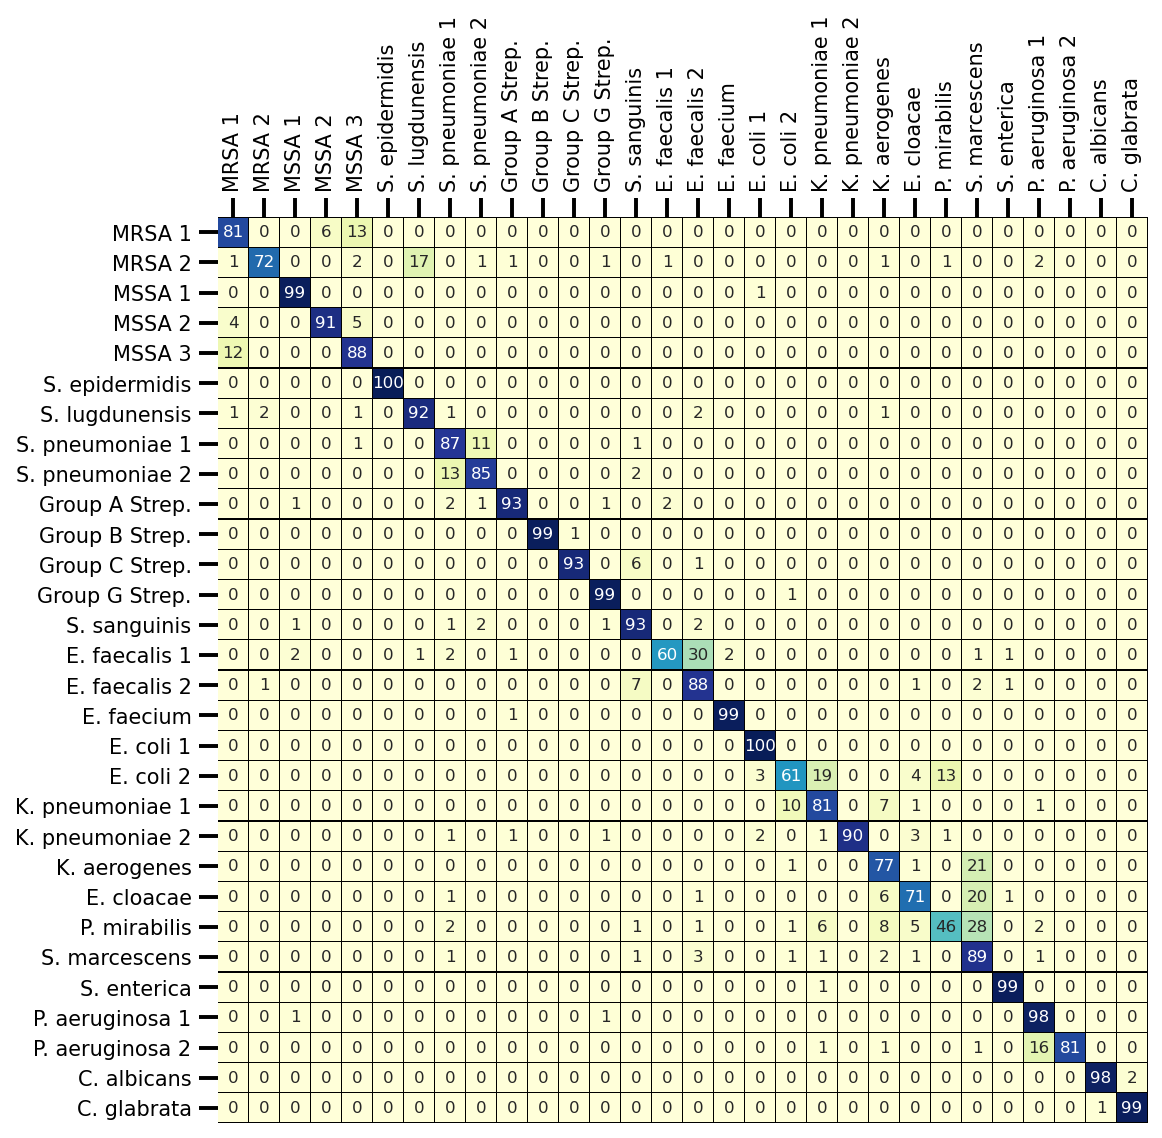

In [6]:
sns.set_context("talk", rc={"font":"Helvetica", "font.size":8,"xtick.size":8,"ytick.size":8})

label = [STRAINS[i] for i in ORDER]
cm = confusion_matrix(true, pred, labels=ORDER)
fig = plt.figure(figsize=(8,8),dpi=150)
cm = 100 * cm / cm.sum(axis=1)[:,np.newaxis]
ax = sns.heatmap(cm, annot=True, cmap='YlGnBu', fmt='0.0f',
                 xticklabels=label, yticklabels=label,linewidths=0.1,linecolor='black',cbar=False)
ax.xaxis.tick_top()
plt.xticks(rotation=90)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [7]:
acc = (pred == true).mean()
print('Accuracy: {:2f}%'.format(100*acc))

Accuracy: 86.966667%


#### Plot the confusion matrix of 8-empiric-antibiotic-treatment

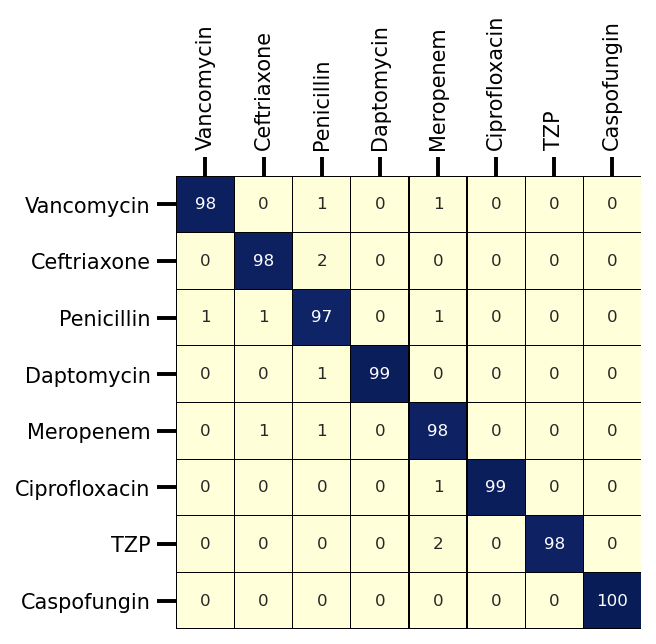

In [8]:
true_ab = np.asarray([ATCC_GROUPINGS[i] for i in true])
pred_ab = np.asarray([ATCC_GROUPINGS[i] for i in pred])
label = [antibiotics[i] for i in ab_order]
sns.set_context("talk", rc={"font":"Helvetica", "font.size":8,"xtick.size":8,"ytick.size":8})
cm = confusion_matrix(true_ab, pred_ab, labels=ab_order)
plt.figure(figsize=(4, 4),dpi=150)
cm = 100 * cm / cm.sum(axis=1)[:,np.newaxis]
ax = sns.heatmap(cm, annot=True, cmap='YlGnBu', fmt='0.0f',
                 xticklabels=label, yticklabels=label,linewidths=0.1,linecolor='black',cbar=False)
ax.xaxis.tick_top()
plt.xticks(rotation=90)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [9]:
acc = (true_ab == pred_ab).mean()
print('Accuracy: {:f}%'.format(100*acc))

Accuracy: 97.800000%
